# Final assignment - Task 1.
## Comparative Analysis of Logistic-Type Growth Models

**Author:** Pablo Rodríguez López
**Course**: Modelization and Simulation of Biosystem
**Masters**: Computational Biology
**University**: Polytechnic University of Madrid
**Date:** January 2026

---

## Task Description:

In this task, you will explore different versions of logistic-type growth models.
* Implement the Exponential map and the Quotient map using the Google Colab notebook
developed during class.
* Run simulations for different values of:
   * r (growth rate)
   * β (for the Quotient map)
* Compare your results with the standard logistic map studied in class.
* Create a bifurcation diagram (plot x as a function of r).
   * Do the maps behave differently?
   * What differences do you observe, and why might they occur?

## Notebook description

This notebook explores and compares three discrete-time population growth models:

1. **Standard Logistic Map**: (seen in class)
$$
x_{n+1} = r x_n (1 - x_n)
$$

2. **Exponential Map**:  (part of the task)
$$
x_{n+1} = x_n e^{r(1-x_n)}
$$

3. **Quotient Map**: (part of the task)
$$
x_{n+1} = \frac{r x_n}{(1 + x_n)^\beta}
$$

These models represent different approaches to modeling population dynamics with carrying capacity. While they share similar biological motivations, their mathematical structures lead to fundamentally different behaviors, particularly in terms of stability, bifurcations, and chaotic dynamics.

### Notebook objectives

- Implement the Exponential and Quotient maps
- Simulate population dynamics for various parameter values
- Generate bifurcation diagrams
- Compare dynamical behaviors with the standard logistic map
- Analyze and interpret key differences

## 1. Setup and Library Imports

We begin by importing the necessary Python libraries for numerical computation and visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Set visualization style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

# Print Python version
import sys
print(f"Python version: {sys.version}")
# Print package versions
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
NumPy version: 2.0.2
Matplotlib version: 3.10.0


## 2. Standard Logistic Map (Reference)

Before implementing the new maps, let's review the standard logistic map:

$$x_{n+1} = r x_n (1 - x_n)$$

This classic model exhibits rich dynamics including:
- Fixed points for low $r$
- Period-doubling bifurcations as $r$ increases
- Chaotic behavior for higher $r$ values
- The famous bifurcation cascade starting around $r \approx 3$

In [2]:
def logistic_map(x, r):
    """
    Standard logistic map.

    Parameters:
    -----------
    x : float
        Current population (normalized, 0 <= x <= 1)
    r : float
        Growth rate parameter

    Returns:
    --------
    float : Next population value
    """
    return r * x * (1 - x)

## 3. Exponential Map Implementation

### Mathematical Formulation

The exponential map is defined as:

$$x_{n+1} = x_n e^{r(1-x_n)}$$

### Biological Interpretation

This model represents population growth where:
- The growth factor $e^{r(1-x_n)}$ is always positive, preventing negative populations
- When $x_n = 0$, growth is maximal: $e^r$
- When $x_n = 1$ (at carrying capacity), growth factor becomes $e^0 = 1$ (steady state)
- The exponential form provides a smoother, more biologically realistic growth response

### Key Differences from Standard Logistic Map

1. **Always non-negative**: The exponential ensures $x_{n+1} > 0$ for all $x_n > 0$
2. **Smoother dynamics**: The exponential function is infinitely differentiable
3. **Different bifurcation structure**: Chaos onset occurs at different parameter values
4. **Reduced sensitivity**: The exponential map tends to be more stable for larger $r$ values

In [3]:
def exponential_map(x, r):
    """
    Exponential map for population dynamics.

    Parameters:
    -----------
    x : float
        Current population (normalized, 0 <= x <= 1)
    r : float
        Growth rate parameter

    Returns:
    --------
    float : Next population value
    """
    return x * np.exp(r * (1 - x))

## 4. Quotient Map Implementation

### Mathematical Formulation

The quotient map (also known as the Beverton-Holt model) is defined as:

$$x_{n+1} = \frac{r x_n}{(1 + x_n)^\beta}$$

### Biological Interpretation

This model incorporates:
- **$r$**: Reproductive rate (similar to other models)
- **$\beta$**: Competition/crowding exponent
  - $\beta = 1$: Linear density dependence
  - $\beta > 1$: Stronger competition effects at high densities
  - $\beta < 1$: Weaker competition (Allee-like effects possible)

The denominator $(1 + x_n)^\beta$ represents **intraspecific competition** that increases with population density.

### Key Differences from Other Maps

1. **Two-parameter family**: Both $r$ and $\beta$ control dynamics
2. **Rational function form**: Different mathematical structure
3. **Stability properties**: For $\beta = 1$, this map is globally stable (no chaos!)
4. **Biological realism**: Better captures contest competition in some species

In [4]:
def quotient_map(x, r, beta):
    """
    Quotient map for population dynamics.

    Parameters:
    -----------
    x : float
        Current population (normalized)
    r : float
        Reproductive rate parameter
    beta : float
        Competition exponent

    Returns:
    --------
    float : Next population value
    """
    return (r * x) / ((1 + x) ** beta)

## 5. Time Series Simulations

Let's simulate population trajectories for each model to observe their temporal dynamics.

In [5]:
def simulate_map(map_function, r, x0=0.1, steps=50, **kwargs):
    """
    Simulate a discrete map over time.

    Parameters:
    -----------
    map_function : callable
        The map function to iterate
    r : float
        Growth parameter
    x0 : float
        Initial condition
    steps : int
        Number of iterations
    **kwargs : additional parameters (e.g., beta for quotient map)

    Returns:
    --------
    np.array : Time series of population values
    """
    x = np.zeros(steps + 1)
    x[0] = x0

    for i in range(steps):
        if 'beta' in kwargs:
            x[i+1] = map_function(x[i], r, kwargs['beta'])
        else:
            x[i+1] = map_function(x[i], r)

    return x

### 5.1 Comparing Dynamics Across Different Growth Rates

We'll examine behavior at three key parameter values:
- **Low r (1)**: below bifurcation point in both logistic and exponential maps
- **Medium low r (2.4)**: Below bifurcation point in logistic, above in exponential
- **Medium high r (3.4)**: In period-doubling regime
- **High r (3.9)**: In chaotic regime (for both exponential and logistic)

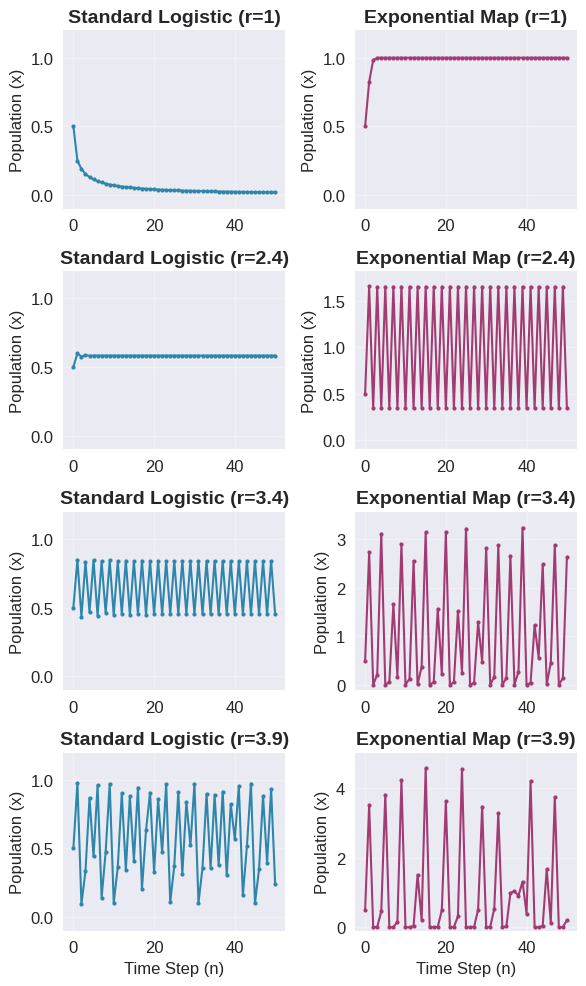

In [6]:
# Compare time series for different r values
r_values = [1, 2.4, 3.4, 3.9]
x0= 0.5
steps=50

fig, axes = plt.subplots(len(r_values),2, figsize=(6, 2.5*len(r_values)))
time = np.arange(steps + 1)

for idx, r in enumerate(r_values):
    # Standard Logistic
    x_logistic = simulate_map(logistic_map, r, x0, steps)
    axes[idx, 0].plot(time, x_logistic, 'o-', markersize=3, linewidth=1.5, color='#2E86AB')
    axes[idx, 0].set_title(f'Standard Logistic (r={r})', fontsize=14, fontweight='bold')
    axes[idx, 0].set_ylabel('Population (x)', fontsize=12)
    if idx == (len(r_values)-1):
        axes[idx, 0].set_xlabel('Time Step (n)', fontsize=12)
    axes[idx, 0].tick_params(axis='both', labelsize=12)
    axes[idx, 0].grid(True, alpha=0.3)
    axes[idx, 0].set_ylim(-0.1, 1.2)

    # Exponential
    x_exp = simulate_map(exponential_map, r, x0, steps)
    axes[idx, 1].plot(time, x_exp, 'o-', markersize=3, linewidth=1.5, color='#A23B72')
    axes[idx, 1].set_title(f'Exponential Map (r={r})', fontsize=14, fontweight='bold')
    axes[idx, 1].set_ylabel('Population (x)', fontsize=12)
    if idx == (len(r_values)-1):
        axes[idx, 1].set_xlabel('Time Step (n)', fontsize=12)
    axes[idx, 1].tick_params(axis='both', labelsize=12)
    axes[idx, 1].grid(True, alpha=0.3)
    axes[idx, 1].set_ylim(-0.1, max(1.2, np.max(x_exp)*1.1))

plt.tight_layout()
plt.show()

Now let's do a similar grid for several r and beta values for the Quotient map

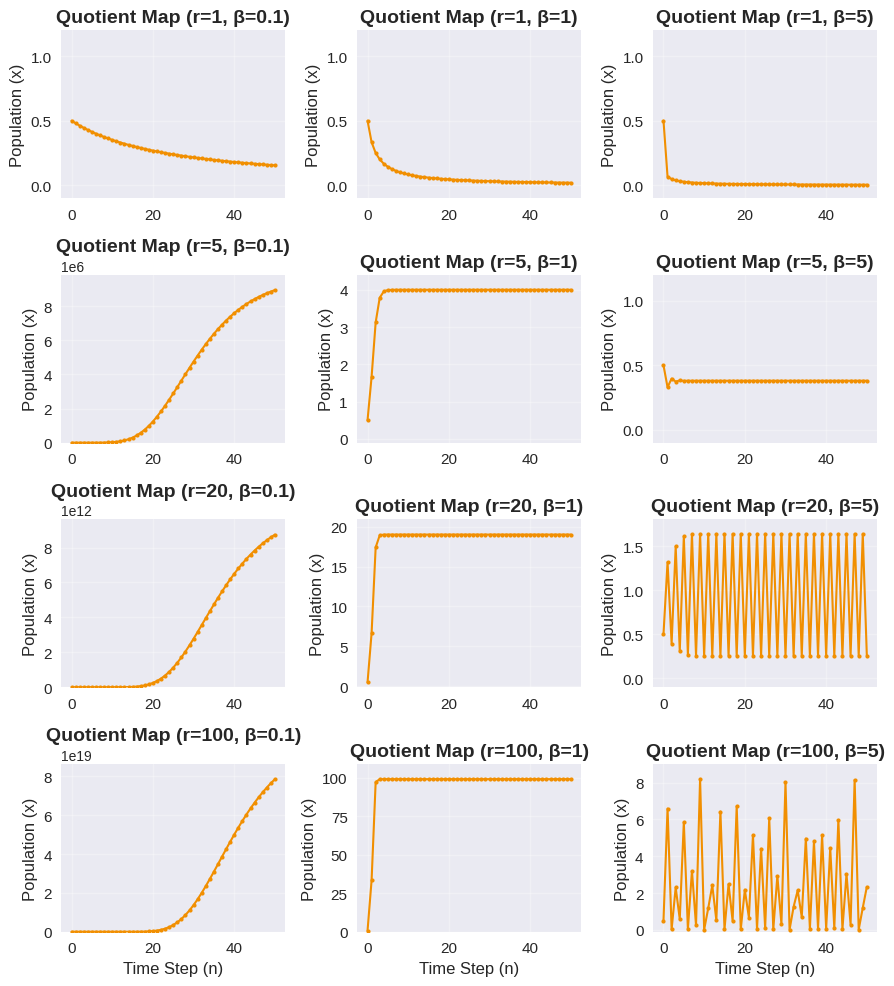

In [7]:
r_values = [1, 5, 20, 100]
beta_values = [0.1, 1, 5]
fig, axes = plt.subplots(len(r_values), len(beta_values), figsize=(3*len(beta_values), 2.5*len(r_values)))
# Ensure axes is always a 2D array, even if one dimension is 1
if len(beta_values) == 1 or len(r_values) == 1:
    axes = np.atleast_2d(axes)

time = np.arange(steps + 1)

for idx1, beta in enumerate(beta_values):
  for idx2, r in enumerate(r_values):
    # Quotient
    x_quot = simulate_map(quotient_map, r, x0, steps, beta=beta)
    axes[idx2, idx1].plot(time, x_quot, 'o-', markersize=3, linewidth=1.5, color='#F18F01')
    axes[idx2, idx1].set_title(f'Quotient Map (r={r}, β={beta})', fontsize=14, fontweight='bold')
    axes[idx2, idx1].set_ylabel('Population (x)', fontsize=12)
    if idx2 == (len(r_values)-1):
      axes[idx2, idx1].set_xlabel('Time Step (n)', fontsize=12)
    axes[idx2, idx1].tick_params(axis='both', labelsize=11)
    axes[idx2, idx1].grid(True, alpha=0.3)
    axes[idx2, idx1].set_ylim(-0.1, max(1.2, np.max(x_quot)*1.1))

plt.tight_layout()

## 6. Bifurcation Diagrams

For each value of $r$:
1. Iterate the map for many steps (200) to allow transients to die out
2. Record the last 50 values (representing the attractor)
3. Plot these values against $r$

In [8]:
def bifurcation_diagram(map_function, r_min, r_max, n_points=2000,
                       iterations=200, last_points=50, x0=0.5, **kwargs):
    """
    Generate bifurcation diagram data.

    Parameters:
    -----------
    map_function : callable
        The map to analyze
    r_min, r_max : float
        Range of r parameter
    n_points : int
        Number of r values to sample
    iterations : int
        Total iterations per r value
    last_points : int
        Number of final points to record
    x0 : float
        Initial condition
    **kwargs : additional parameters

    Returns:
    --------
    r_values, x_values : arrays for plotting
    """
    r_values = np.linspace(r_min, r_max, n_points)
    r_list = []
    x_list = []

    for r in r_values:
        x = x0

        # Iterate to reach attractor
        for i in range(iterations):
            if 'beta' in kwargs:
                x = map_function(x, r, kwargs['beta'])
            else:
                x = map_function(x, r)

            # Record last points
            if i >= iterations - last_points:
                r_list.append(r)
                x_list.append(x)

    return np.array(r_list), np.array(x_list)

### 6.1 Standard Logistic Map Bifurcation Diagram

Computing bifurcation diagram for Standard Logistic Map...


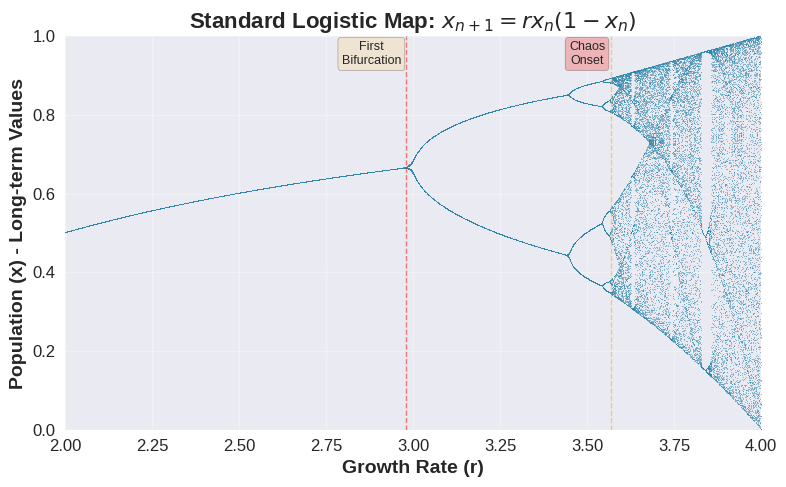

✓ Standard Logistic Map complete


In [9]:
# Standard Logistic Map
print("Computing bifurcation diagram for Standard Logistic Map...")
r_min = 2
r_max = 4
n_points = 1000*(r_max-r_min)
r_log, x_log = bifurcation_diagram(logistic_map, r_min, r_max, n_points=n_points)

plt.figure(figsize=(8, 5))
plt.plot(r_log, x_log, ',', color='#2E86AB', alpha=0.5, markersize=0.5)
plt.xlabel('Growth Rate (r)', fontsize=14, fontweight='bold')
plt.ylabel('Population (x) - Long-term Values', fontsize=14, fontweight='bold')
plt.title('Standard Logistic Map: $x_{n+1} = r x_n (1-x_n)$',
         fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlim(r_min, r_max)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add annotations for key features
plt.axvline(x=2.98, color='red', linestyle='--', alpha=0.5, linewidth=1)
plt.text(2.88, 0.93, 'First\nBifurcation', ha='center', fontsize=9,
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.axvline(x=3.57, color='orange', linestyle='--', alpha=0.5, linewidth=1)
plt.text(3.50, 0.93, 'Chaos\nOnset', ha='center', fontsize=9,
        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

plt.tight_layout()
plt.show()

print("✓ Standard Logistic Map complete")

### 6.2 Exponential Map Bifurcation Diagram

Computing bifurcation diagram for Exponential Map...


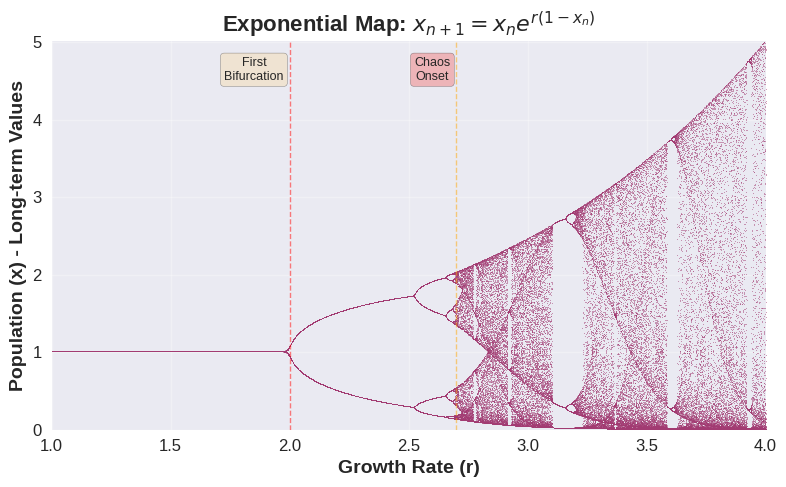

<Figure size 1000x600 with 0 Axes>

✓ Exponential Map complete


In [10]:
# Exponential Map
print("Computing bifurcation diagram for Exponential Map...")
r_min = 1
r_max = 4
n_points = 1000*(r_max-r_min)
r_exp, x_exp = bifurcation_diagram(exponential_map, r_min, r_max, n_points=n_points)

plt.figure(figsize=(8, 5))
plt.plot(r_exp, x_exp, ',', color='#A23B72', alpha=0.5, markersize=0.5)
plt.xlabel('Growth Rate (r)', fontsize=14, fontweight='bold')
plt.ylabel('Population (x) - Long-term Values', fontsize=14, fontweight='bold')
plt.title('Exponential Map: $x_{n+1} = x_n e^{r(1-x_n)}$',
         fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(r_min, r_max)
plt.ylim(0, max(1.5, np.max(x_exp)))

# Add annotations for key features
plt.axvline(x=2.00, color='red', linestyle='--', alpha=0.5, linewidth=1)
plt.text(1.85, max(1.5, np.max(x_exp))*0.90, 'First\nBifurcation', ha='center', fontsize=9,
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.axvline(x=2.7, color='orange', linestyle='--', alpha=0.5, linewidth=1)
plt.text(2.6, max(1.5, np.max(x_exp))*0.90, 'Chaos\nOnset', ha='center', fontsize=9,
        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

print("✓ Exponential Map complete")

### 6.3 Quotient Map Bifurcation Diagrams

For the quotient map, we'll explore multiple values of $\beta$ to see how competition strength affects dynamics.

Computing bifurcation diagram for Quotient Map (β=0.05)...
Computing bifurcation diagram for Quotient Map (β=1.0)...
Computing bifurcation diagram for Quotient Map (β=2.0)...
Computing bifurcation diagram for Quotient Map (β=3.0)...
Computing bifurcation diagram for Quotient Map (β=5.0)...
Computing bifurcation diagram for Quotient Map (β=20)...


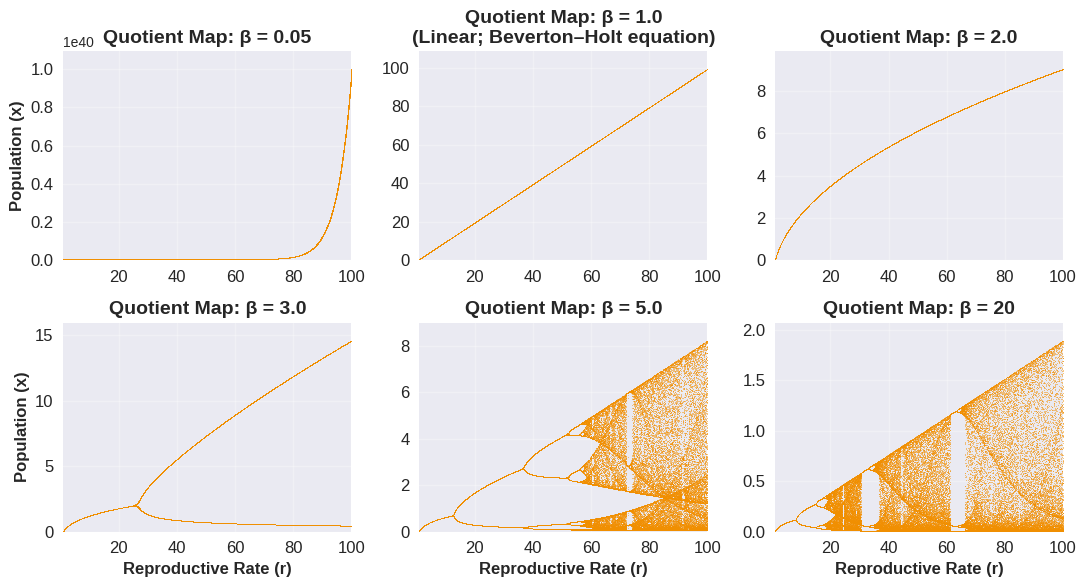

✓ All Quotient Map diagrams complete


In [11]:
# Quotient Map with different beta values
beta_values = [0.05, 1.0, 2.0, 3.0, 5.0, 20]
r_min = 1
r_max = 100
fig, axes = plt.subplots(2, 3, figsize=(11, 6))
axes = axes.flatten()

for idx, beta in enumerate(beta_values):
    print(f"Computing bifurcation diagram for Quotient Map (β={beta})...")
    r_quot, x_quot = bifurcation_diagram(quotient_map, r_min, r_max,
                                         n_points=2000, beta=beta)

    axes[idx].plot(r_quot, x_quot, ',', color='#F18F01', alpha=0.5, markersize=0.5)
    if idx == 0 or idx == 3:
          axes[idx].set_ylabel('Population (x)', fontsize=12, fontweight='bold')
    if idx == 3 or idx == 4 or idx == 5:
          axes[idx].set_xlabel('Reproductive Rate (r)', fontsize=12, fontweight='bold')
    if beta != 1.0:
      axes[idx].set_title(f'Quotient Map: β = {beta}', fontsize=14, fontweight='bold')
    else:
      axes[idx].set_title(f'Quotient Map: β = {beta}\n(Linear; Beverton–Holt equation)', fontsize=14, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(axis='both', labelsize=12)
    axes[idx].set_xlim(r_min, r_max)
    axes[idx].set_ylim(0, max(1.5, np.max(x_quot)*1.1))

#plt.suptitle('Quotient Map: $x_{n+1} = \\frac{r x_n}{(1 + x_n)^\\beta}$', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("✓ All Quotient Map diagrams complete")

Computing bifurcation diagram for Quotient Map (β=2.0)...


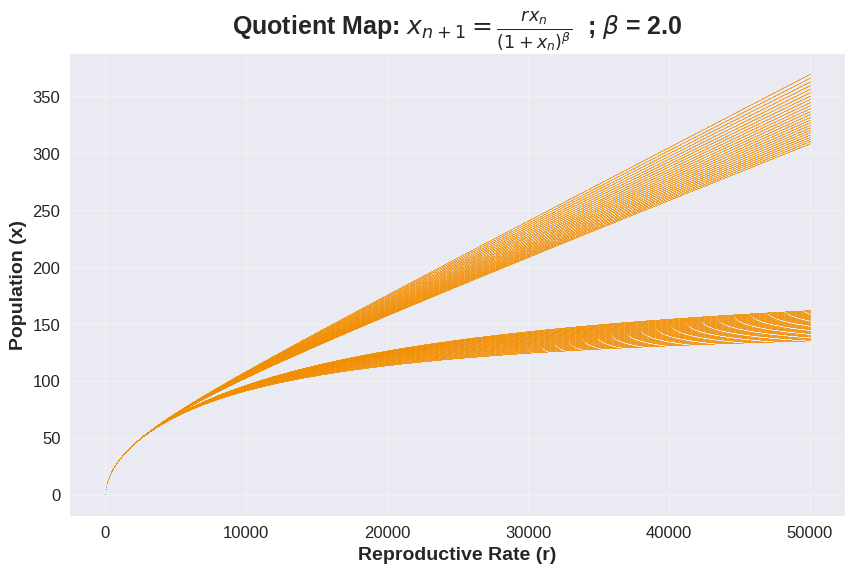

✓ Quotient Map diagram complete for β = 2.0


In [12]:
# Quotient Map for a single beta value
custom_beta = 2.00 # Directly define the single beta value
r_min = 1
r_max = 50000
print(f"Computing bifurcation diagram for Quotient Map (β={custom_beta})...")
r_quot, x_quot = bifurcation_diagram(quotient_map, r_min, r_max,
                                     n_points=2000, beta=custom_beta)
fig = plt.plot(r_quot, x_quot, ',', color='#F18F01', alpha=0.5, markersize=0.5)
plt.xlabel('Reproductive Rate (r)', fontsize=14, fontweight='bold')
plt.ylabel('Population (x)', fontsize=14, fontweight='bold')
plt.title(r'Quotient Map: $x_{n+1} = \frac{r x_n}{(1 + x_n)^\beta}$  ; $\beta$ ='+f' {custom_beta}', size=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print(f"✓ Quotient Map diagram complete for β = {custom_beta}")

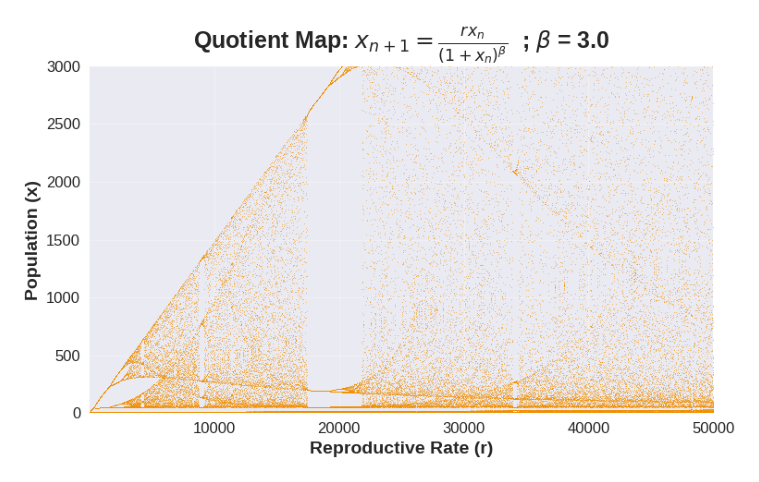

🎥 Animation saved as 'quotient_bifurcation_diagram_evolution.gif'


In [13]:
# Let's make a gif of how this diagram evolves with beta
import io, imageio.v2 as imageio
from IPython.display import clear_output, display
beta_values = np.arange(1.5,3.01,0.01)
frames = []

r_min = 1 # Ensure r_min is defined, assuming it was defined earlier
r_max = 50000 # Ensure r_max is defined, assuming it was defined earlier

for beta in beta_values:
    r_quot, x_quot = bifurcation_diagram(quotient_map, r_min, r_max,
                                     n_points=2000, beta=beta) # Use beta from the loop here

    fig, ax = plt.subplots(figsize=(8, 5)) # Create a new figure and axes for each plot
    ax.plot(r_quot, x_quot, ',', color='#F18F01', alpha=0.5, markersize=0.5)
    ax.set_xlabel('Reproductive Rate (r)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Population (x)', fontsize=14, fontweight='bold')
    ax.set_title(r'Quotient Map: $x_{n+1} = \frac{r x_n}{(1 + x_n)^\beta}$  ; $\beta$ ='+f' {round(beta,2)}', size=18,fontweight='bold')
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(r_min, r_max)
    ax.set_ylim(0, 3000)

    plt.tight_layout()
    buf = io.BytesIO()
    fig.savefig(buf, format='png') # Save the figure object
    buf.seek(0)
    frames.append(imageio.imread(buf))
    plt.close(fig) # Close the figure to free up memory

    # Mostrar animación en vivo
    clear_output(wait=True)
    # display(plt.imshow(frames[-1])) # This will try to display a plot.imshow object directly, which is not what we want for animation.
    # For displaying a single image in a loop, you can just display the image data
    # if you want to see the progress. For a GIF, it's typically rendered at the end.
    # If you want a live preview, consider using IPython.display.Image
    if frames: # Only display if there's at least one frame
        plt.imshow(frames[-1])
        plt.axis('off')
        plt.show()

imageio.mimsave('quotient_bifurcation_diagram_evolution.gif', frames, fps=10)
print("🎥 Animation saved as 'quotient_bifurcation_diagram_evolution.gif'")

(My recommendation: open this .gif file in VSCode)

## 7. Side-by-Side Comparison

Let's create a comprehensive visual comparison of all three maps.

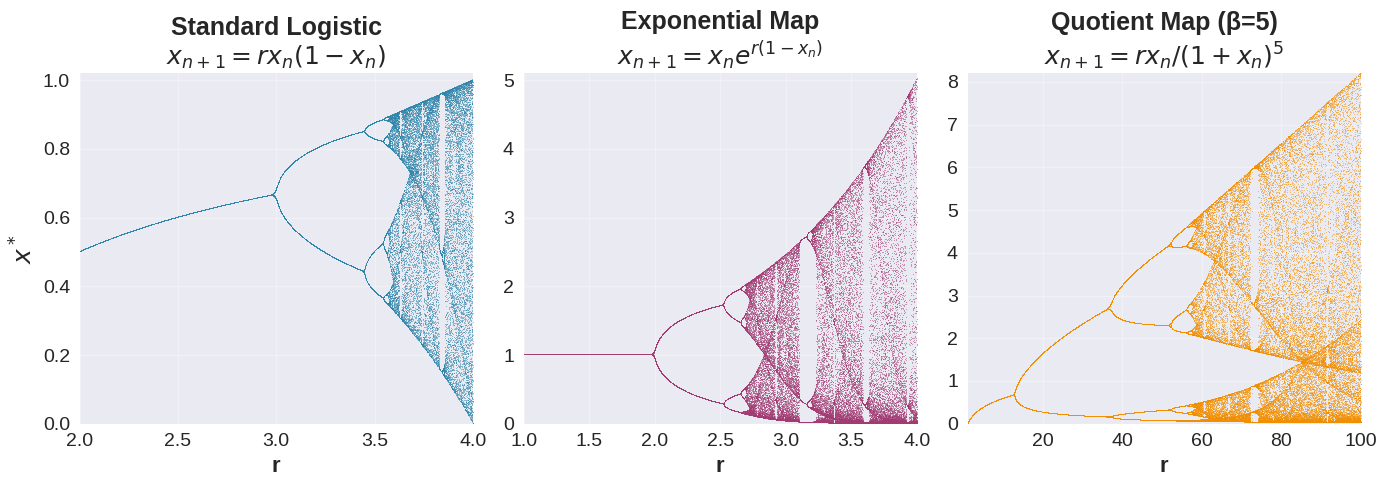

In [14]:
# Create comprehensive comparison figure
fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 3, figure=fig)

# Standard Logistic
ax1 = fig.add_subplot(gs[0, 0])
r_min = 2; r_max = 4
r_log, x_log = bifurcation_diagram(logistic_map, r_min, r_max, n_points=2000)
ax1.plot(r_log, x_log, ',', color='#2E86AB', alpha=0.5, markersize=0.5)
ax1.set_xlabel('r', fontsize=16, fontweight='bold')
ax1.set_ylabel(r'$x^*$', fontsize=18, fontweight='bold')
ax1.set_title('Standard Logistic\n$x_{n+1} = r x_n (1-x_n)$',
             fontsize=18, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_xlim(r_min, r_max)
ax1.set_ylim(0, 1.02)

# Exponential
r_min = 1; r_max = 4.0
r_exp, x_exp = bifurcation_diagram(exponential_map, r_min, r_max, n_points=2000)
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(r_exp, x_exp, ',', color='#A23B72', alpha=0.5, markersize=0.5)
ax2.set_xlabel(r'r', fontsize=16, fontweight='bold')
ax2.set_title('Exponential Map\n$x_{n+1} = x_n e^{r(1-x_n)}$',
             fontsize=18, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='both', labelsize=14)
ax2.set_xlim(r_min, r_max)
ax2.set_ylim(0, 5.1)

# Quotient (beta=2.0)
beta = 5; r_min = 1; r_max = 100
r_quot, x_quot = bifurcation_diagram(quotient_map, r_min, r_max,
                                       n_points=2000, beta=beta)
ax3 = fig.add_subplot(gs[0, 2])
ax3.plot(r_quot, x_quot, ',', color='#F18F01', alpha=0.5, markersize=0.5)
ax3.set_xlabel(r'r', fontsize=16, fontweight='bold')
ax3.set_title(f'Quotient Map (β={beta})\n'+'$x_{n+1} =$'+ f'$rx_n/(1+x_n)^{beta}$',
             fontsize=18, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='both', labelsize=14)
ax3.set_xlim(r_min, r_max)
ax3.set_ylim(0, 8.2)

plt.tight_layout()
plt.show()

## References

1. May, R. M. (1976). Simple mathematical models with very complicated dynamics. *Nature*, 261(5560), 459-467.

2. Beverton, R. J., & Holt, S. J. (1957). On the dynamics of exploited fish populations. *Fishery Investigations Series II*, 19, 1-533.

3. Maynard Smith, J., & Slatkin, M. (1973). The stability of predator-prey systems. *Ecology*, 54(2), 384-391.

4. Strogatz, S. H. (2015). *Nonlinear Dynamics and Chaos: With Applications to Physics, Biology, Chemistry, and Engineering*. CRC Press.

5. Cushing, J. M., et al. (2003). Chaos in Ecology: Experimental Nonlinear Dynamics. *Academic Press*.

6. Feigenbaum, M. J. (1978). Quantitative universality for a class of nonlinear transformations. *Journal of Statistical Physics*, 19(1), 25-52.

